# [AIST++](https://google.github.io/aistplusplus_dataset/download.html) & [SMPL](https://smpl.is.tue.mpg.de/) 
---
# Exploration card 

Under scope: techniques for motion data preparation and transformation from raw to 3D body mesh 

AISTpp is human dance motion dataset by google (1408 motions, 10 music genres). API source include tools to transform data from 2d video to 3d joints, motion features and smpl body mesh

SMPL is human body 3D model that is based on skinning and blend shapes model that able to visualize (from processed 3D joints motion transforms)

aist pipeline:

<img width="800" alt="aist_pipeline" src="aist_smpl/figs/aist_pipeline.jpg">

In [ ]:
### Scoped File Structure ###

"""

├── aist_plusplus_final    <- AIST++ human motion dataset by Google
│   ├── cameras            <- camera data and settings
│   ├── keypoints2d        <- pickled 2D keypoints annotation
│   ├── keypoints3d        <- pickled 3D keypoints annotation (N,17,3)
│   ├── motions            <- pickled SMPL human motion sequence
│   └── splits             <- splits (all, train, val) stored as filenames in text format
│
└── smpl                   <- A Skinned Multi-Person Linear Model
    ├── models             <- model of the of the human body (male and female)
    └── smpl_webuser       <- description and utility scripts

"""

## AIST++

### 3D&2D Keypoints Annotation
---
    
COCO-format keypoints annotation in both 2D and 3D. Each keypoints sequence is stored in a .pkl file with the following attributes:

- `keypoints3d`: Sequences of 3D keypoints reconstructed frame-by-frame. Array shape is (N, 17, 3).
- `keypoints3d_optim`: Sequences of 3D keypoints reconstructed with temporal smoothness and constrains.
- `keypoints2d`: Multi-view frame-by-frame 2D keypoints detection results. Array shape is (9, N, 17, 3). The last dimension is (x, y, confidence).
    
    
### Human Motion Sequence
---
    
Each SMPL-format human motion sequence is stored in a .pkl file with the following attributes:

- `smpl_poses`: Sequences of SMPL pose parameters. Array shape is (N, 24, 3).
- `smpl_scaling`: Human body scaling factor. A scalar value for each sequence.
- `smpl_trans`: Motion 3D trajectory. Array shape is (N, 3).


### Camera Parameters
---

The camera intrinsic and extrinsic information is stored in two files.

Individual environment settings, each with 9 cameras in the environment. (setting_<suffix>.json)
Mapping from environment settings to sequence names. (mapping.txt)
Each camera has the following attributes:

- `name`: The camera name corresponding to the AIST database.
- `size`: Canvas resolution. It is [1920, 1080] for all AIST 1080P video.
- `matrix`: The 3x3 camera intrinsic matrix.*
- `rotation`: The global rotation vector in Rodrigues format.*
- `translation`: The global translation vector.*
- `distortions`: Distortion coefficients.*

### 3D keypoints data format

In [1]:
from aist_smpl.notebook_utils import get_sample_3d_pts

pts = get_sample_3d_pts(sample_idx=0)
print(list(pts.keys()), '\n')
pts = pts['keypoints3d']
print("Sequence shape: ", pts.shape, '\n')
print("One frame points with xyz coordinates for each joint:")
pts[0]  # 

['keypoints3d', 'keypoints3d_optim'] 

Sequence shape:  (720, 17, 3) 

One frame points with xyz coordinates for each joint:


array([[  2.81138084, 201.99220562,  12.91493244],
       [  6.44399073, 204.51272267,  11.20487213],
       [ -0.88811938, 206.51490173,  10.80847147],
       [  8.28762495, 202.63047013,   1.54591164],
       [ -7.39308523, 206.65766392,   1.87833716],
       [  7.18501729, 184.98674594, -10.72028796],
       [-23.18770051, 194.67420397,   0.72149159],
       [ 25.94491449, 172.30294959, -25.07025369],
       [-47.82511037, 200.4296056 ,   7.59187026],
       [ 49.7592018 , 180.01039101, -26.93928898],
       [-67.65883105, 208.26708409,  16.86917575],
       [ -4.86786212, 137.69196972,   3.84439216],
       [-26.8664033 , 139.37988811,   5.6667998 ],
       [ -8.70891526, 104.86441986,  22.90254742],
       [-22.73536524, 103.76252982,  12.27741054],
       [-21.60164924,  73.24320636,  27.81284715],
       [-14.65732814,  76.64883946, -14.9289796 ]])

Human body joints plot example

<img width="600" alt="pose example 1" src="aist_smpl/figs/001.png">

### AISTpp smpl motion data

In [2]:
from aist_smpl.notebook_utils import get_aist_smpl_sample
smpl_poses, smpl_scaling, smpl_trans = get_aist_smpl_sample(sample_idx=0)
print("data shapes", smpl_poses.shape, smpl_scaling.shape, smpl_trans.shape, '\n')

# Raw data

# print(f'smpl pose params:\n{list(smpl_poses[0])}\n')
# print(f'smpl scale factor:\n{smpl_scaling}\n')
# print(f'smpl translation vector:\n{smpl_trans[0]}')

# Extract global orientation, pose and translation data
global_orient = smpl_poses[:, 0:1]
body_pose = smpl_poses[:, 1:]
transl = smpl_trans / smpl_scaling

print(f'global_orient\n{global_orient[:1]}\n')
print(f'body_pose\n{body_pose[:1]}\n')
print(f'translation\n{transl[:1]}')

data shapes (720, 72) (1,) (720, 3) 

global_orient
[[-0.31962776]]

body_pose
[[ 6.30848184e-02 -1.06007569e-01 -2.17060193e-01 -1.60429161e-02
   4.34172712e-02  9.62639898e-02  1.65340900e-01  1.90509632e-01
   1.99882060e-01  4.95583266e-02  7.34406337e-02  3.02819610e-01
   1.31282285e-02 -3.05005163e-01  7.95431077e-01  4.54362668e-02
   3.90470088e-01  1.73528358e-01  8.01684484e-02 -1.10489167e-01
  -9.43164399e-04  6.73364289e-03 -1.12804761e-02  2.03122711e-03
   4.51988715e-04 -3.05180065e-03  1.51259422e-01  9.11755636e-02
  -1.85514361e-01  3.31600895e-03 -5.59658103e-04  5.67489024e-03
   9.22628678e-04  4.54236008e-03  1.25869177e-03  1.85347751e-01
   5.25249809e-04 -8.06704164e-02 -1.20061964e-01  2.01239347e-01
   2.91612335e-02 -8.17074180e-02 -4.87445481e-02  1.18753817e-02
  -1.53902635e-01 -1.36689201e-01  1.98653042e-01 -3.20442878e-02
  -4.73536514e-02 -1.89328149e-01 -4.48100939e-02  7.94260502e-02
   1.08929008e-01  5.08732488e-03 -3.81764948e-01  7.25744784e-

### SMPL Model

The model keeps data of body mesh itself and various transform parameters vectors to move the mesh

In [3]:
from matplotlib import pyplot as plt, rcParams
from aist_smpl.notebook_utils import get_smpl_model_data

data = get_smpl_model_data()
data.keys()

dict_keys(['J_regressor_prior', 'f', 'J_regressor', 'kintree_table', 'J', 'weights_prior', 'weights', 'vert_sym_idxs', 'posedirs', 'pose_training_info', 'bs_style', 'v_template', 'shapedirs', 'bs_type'])

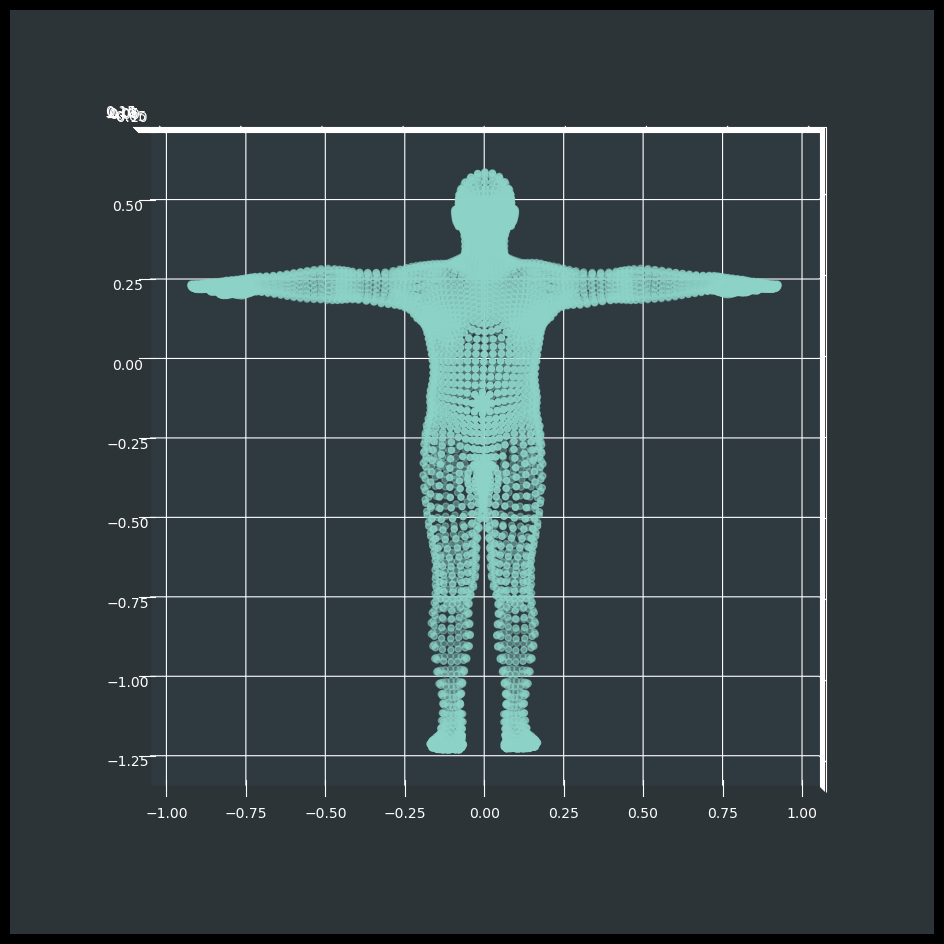

In [4]:
# %matplotlib notebook
plt.style.use('dark_background')
rcParams['patch.facecolor'] = '#3c638250'
rcParams['axes.facecolor'] = '#2D3437'
rcParams['axes.edgecolor'] = '#2D3437'
rcParams['axes3d.xaxis.panecolor'] = '#2D3437'
rcParams['axes3d.yaxis.panecolor'] = '#2D3437'
rcParams['axes3d.zaxis.panecolor'] = '#3c638220'

pts = data['v_template']
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

ax.scatter(pts[::,0], pts[::,1], pts[::,2])
ax.set_aspect('equal')
ax.view_init(elev=90, azim=-90)

The model compatible with python visualization ([vedo](https://github.com/marcomusy/vedo?ysclid=lmpg0kvad4543718809)+[trimesh](https://github.com/mikedh/trimesh?ysclid=lmpg0qse6r325032433)) and special 3D-graphic software like Maya, Blender e.t.c.

### Other pose model formats 
---

[STAR](https://star.is.tue.mpg.de)

[OpenPose](https://github.com/CMU-Perceptual-Computing-Lab/openpose)

[AlphaPose](https://github.com/MVIG-SJTU/AlphaPose)

### Extract AIST features

In [5]:
from aist_smpl.notebook_utils import extract_aist_feats

kinetic_features, manual_features = extract_aist_feats()

print("shapes", kinetic_features.shape, manual_features.shape, '\n')
print(f"kinetic_features\n{kinetic_features}\n")
print(f"manual_features\n{manual_features}")

shapes (72,) (32,) 

kinetic_features
[1.87531546e-01 5.12459949e-02 5.72307617e+03 2.24852338e-01
 5.22967093e-02 5.44573389e+03 2.28558287e-01 5.22124209e-02
 5.40491846e+03 1.58836111e-01 5.84306233e-02 6.13643555e+03
 6.15944982e-01 8.96953419e-02 4.25603418e+03 6.00493133e-01
 8.23139399e-02 4.22415869e+03 1.22832954e-01 6.42093047e-02
 6.60781250e+03 7.76972950e-01 1.23788714e-01 2.97782397e+03
 1.01247633e+00 9.25851837e-02 3.00217041e+03 1.11928381e-01
 6.61072955e-02 6.79165869e+03 9.60618258e-01 6.61669821e-02
 2.73845264e+03 1.26145136e+00 4.96156439e-02 2.79023340e+03
 6.32510707e-02 5.79122752e-02 7.48149805e+03 9.12758186e-02
 6.21745549e-02 7.19221582e+03 8.44592378e-02 6.48950115e-02
 7.14709424e+03 9.60500240e-02 5.66033274e-02 7.63856982e+03
 1.57144949e-01 1.23712637e-01 7.36708105e+03 1.51678666e-01
 1.15302920e-01 7.26174658e+03 7.34022200e-01 5.24220109e-01
 6.90027930e+03 7.42862046e-01 6.47578597e-01 6.80031152e+03
 3.01039934e+00 2.22425985e+00 6.90170654e+03 2

### Motion Data Process

In [6]:
from aist_smpl.notebook_utils import process_motion_data
smpl_motion, beats = process_motion_data()

print("shapes", smpl_motion.shape, beats.shape, '\n')
print(f"smpl_motion\n{smpl_motion}\n")
print(f"beats\n{beats}")

shapes (720, 222) (720, 1) 

smpl_motion
[[-1.57740563e-01  1.80594552e+00  1.91050256e-03 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [-1.59291998e-01  1.80676162e+00  1.81246258e-03 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [-1.61095574e-01  1.80793464e+00  7.61831761e-04 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 ...
 [ 5.41751795e-02  1.89349711e+00  5.16174249e-02 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 5.45739532e-02  1.89362693e+00  5.16184382e-02 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 5.46077006e-02  1.89347470e+00  5.20112105e-02 ...  1.00000000e+00
   1.00000000e+00  0.00000000e+00]]

beats
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.